In [1]:
import json
import warnings

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

# Path

In [2]:
base_dir = '../input/eurosat-dataset/EuroSAT'

test_path = f'{base_dir}/test.csv'
train_path = f'{base_dir}/train.csv'
validation_path = f'{base_dir}/validation.csv'

decoder_path = f"{base_dir}/label_map.json"

# Load

In [3]:
train = pd.read_csv(train_path, index_col=[0])
validation = pd.read_csv(validation_path, index_col=[0])
test = pd.read_csv(test_path, index_col=[0])

In [4]:
with open(decoder_path) as jsonFile:
    decoder = json.load(jsonFile)
decoder

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [5]:
reverse_decoder = {v: k for k, v in decoder.items()}
reverse_decoder

{0: 'AnnualCrop',
 1: 'Forest',
 2: 'HerbaceousVegetation',
 3: 'Highway',
 4: 'Industrial',
 5: 'Pasture',
 6: 'PermanentCrop',
 7: 'Residential',
 8: 'River',
 9: 'SeaLake'}

# Dimensions

In [6]:
dataset = pd.concat((train, validation, test))

dimensions = np.array([dataset.shape for dataset in (train, validation, test)])
print(f"  dimensions \n |          |\n{dimensions}")

assert (dimensions[:, 0].sum() == dataset.shape[0]) & (dataset.shape[1] == train.shape[1]) 

print(f"---------------\n   {dataset.shape}")

  dimensions 
 |          |
[[18900     3]
 [ 5400     3]
 [ 2700     3]]
---------------
   (27000, 3)


# Split data

In [7]:
for name, subset in zip("train, validation, test".split(', '), 
                        dimensions):
    print(f"{name} => {subset[0] / dataset.shape[0] * 100} %")

train => 70.0 %
validation => 20.0 %
test => 10.0 %


# Data distributions

In [8]:
get_part_collection = lambda dataset: dataset.Label.value_counts().values / dataset.shape[0]

if np.allclose(*list(map(get_part_collection, (train, validation, test)))):
    print("Stratified Splitting")

Stratified Splitting


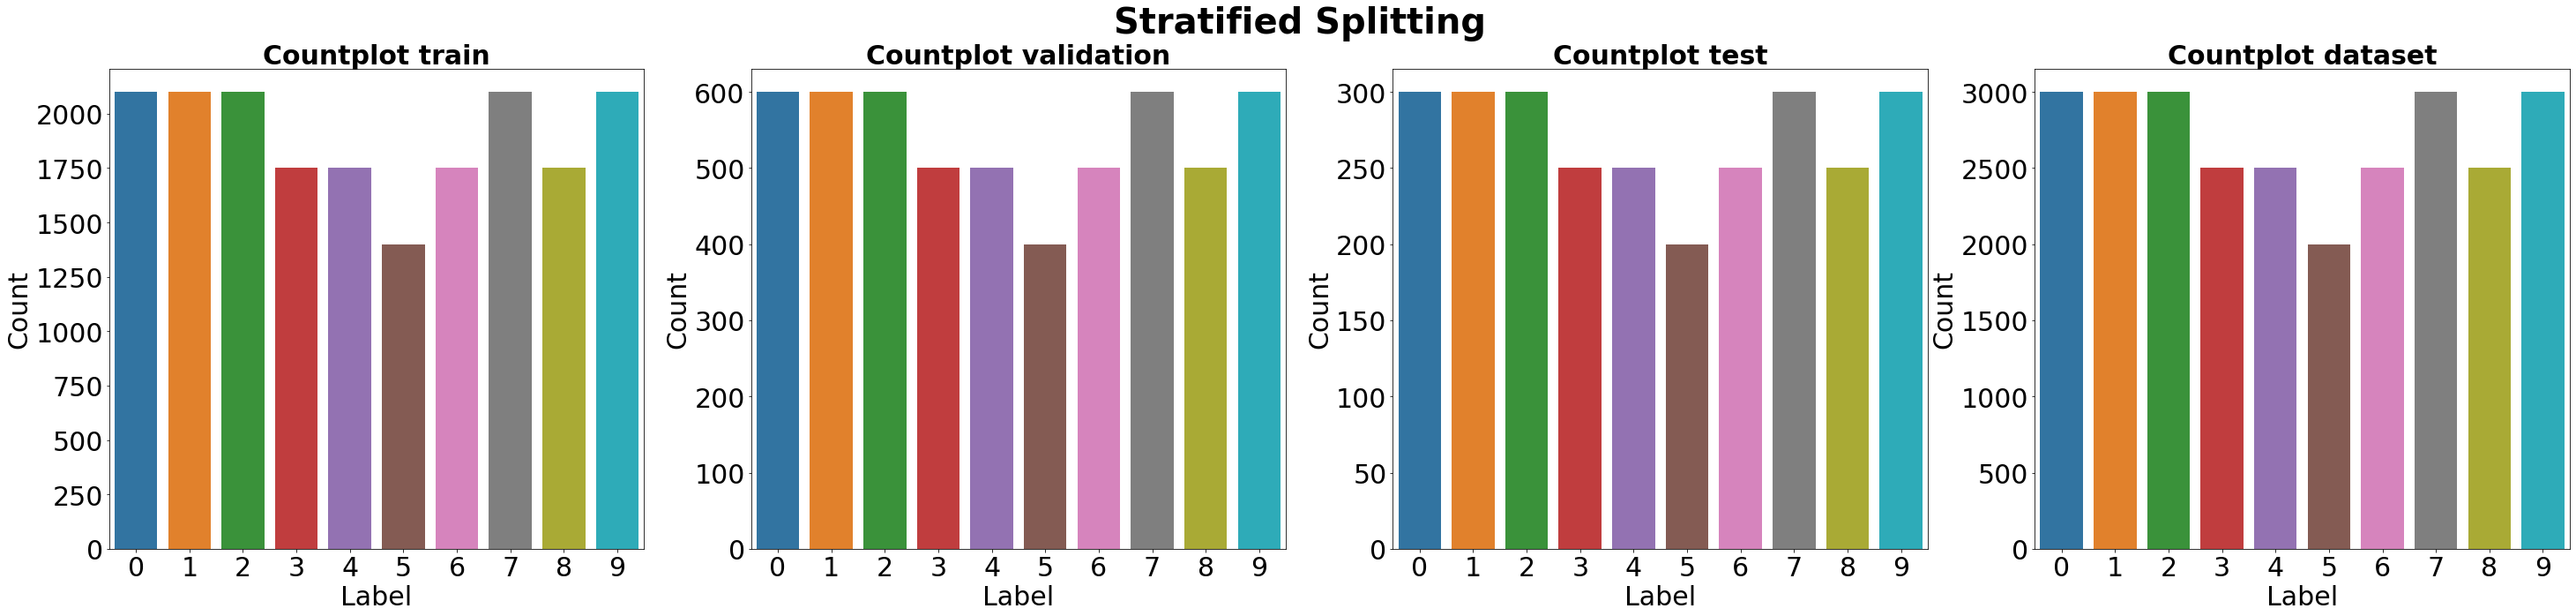

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(50,10))
fig.suptitle('Stratified Splitting', fontweight="bold", size=40)

name_set = "train, validation, test, dataset".split(', ')

for i, data in enumerate([train, validation, test, dataset]):
    
    picture = sns.countplot(data.Label, ax=ax[i]);
    
    ax[i].set_title(f'Countplot {name_set[i]}', fontweight="bold", size=30)
    picture.set_xlabel("Label",fontsize=30)
    picture.set_ylabel("Count",fontsize=30)
    picture.tick_params(labelsize=30)

plt.show()

# Show image samples

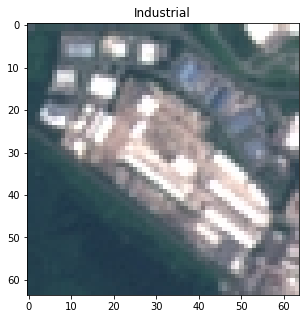

In [10]:
label = 4
target = reverse_decoder[label]
file_name = dataset.query(f'Label == {label}').sample(1).Filename.values[0]

path_2_file = f"{base_dir}/{file_name}"

image = cv2.imread(path_2_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.title(target)
plt.imshow(image);

In [11]:
def random_image_path(label, dataset):
    file_name = dataset.query(f'Label == {label}').sample(1).Filename.values[0]

    path_2_file = f"{base_dir}/{file_name}"
    return path_2_file

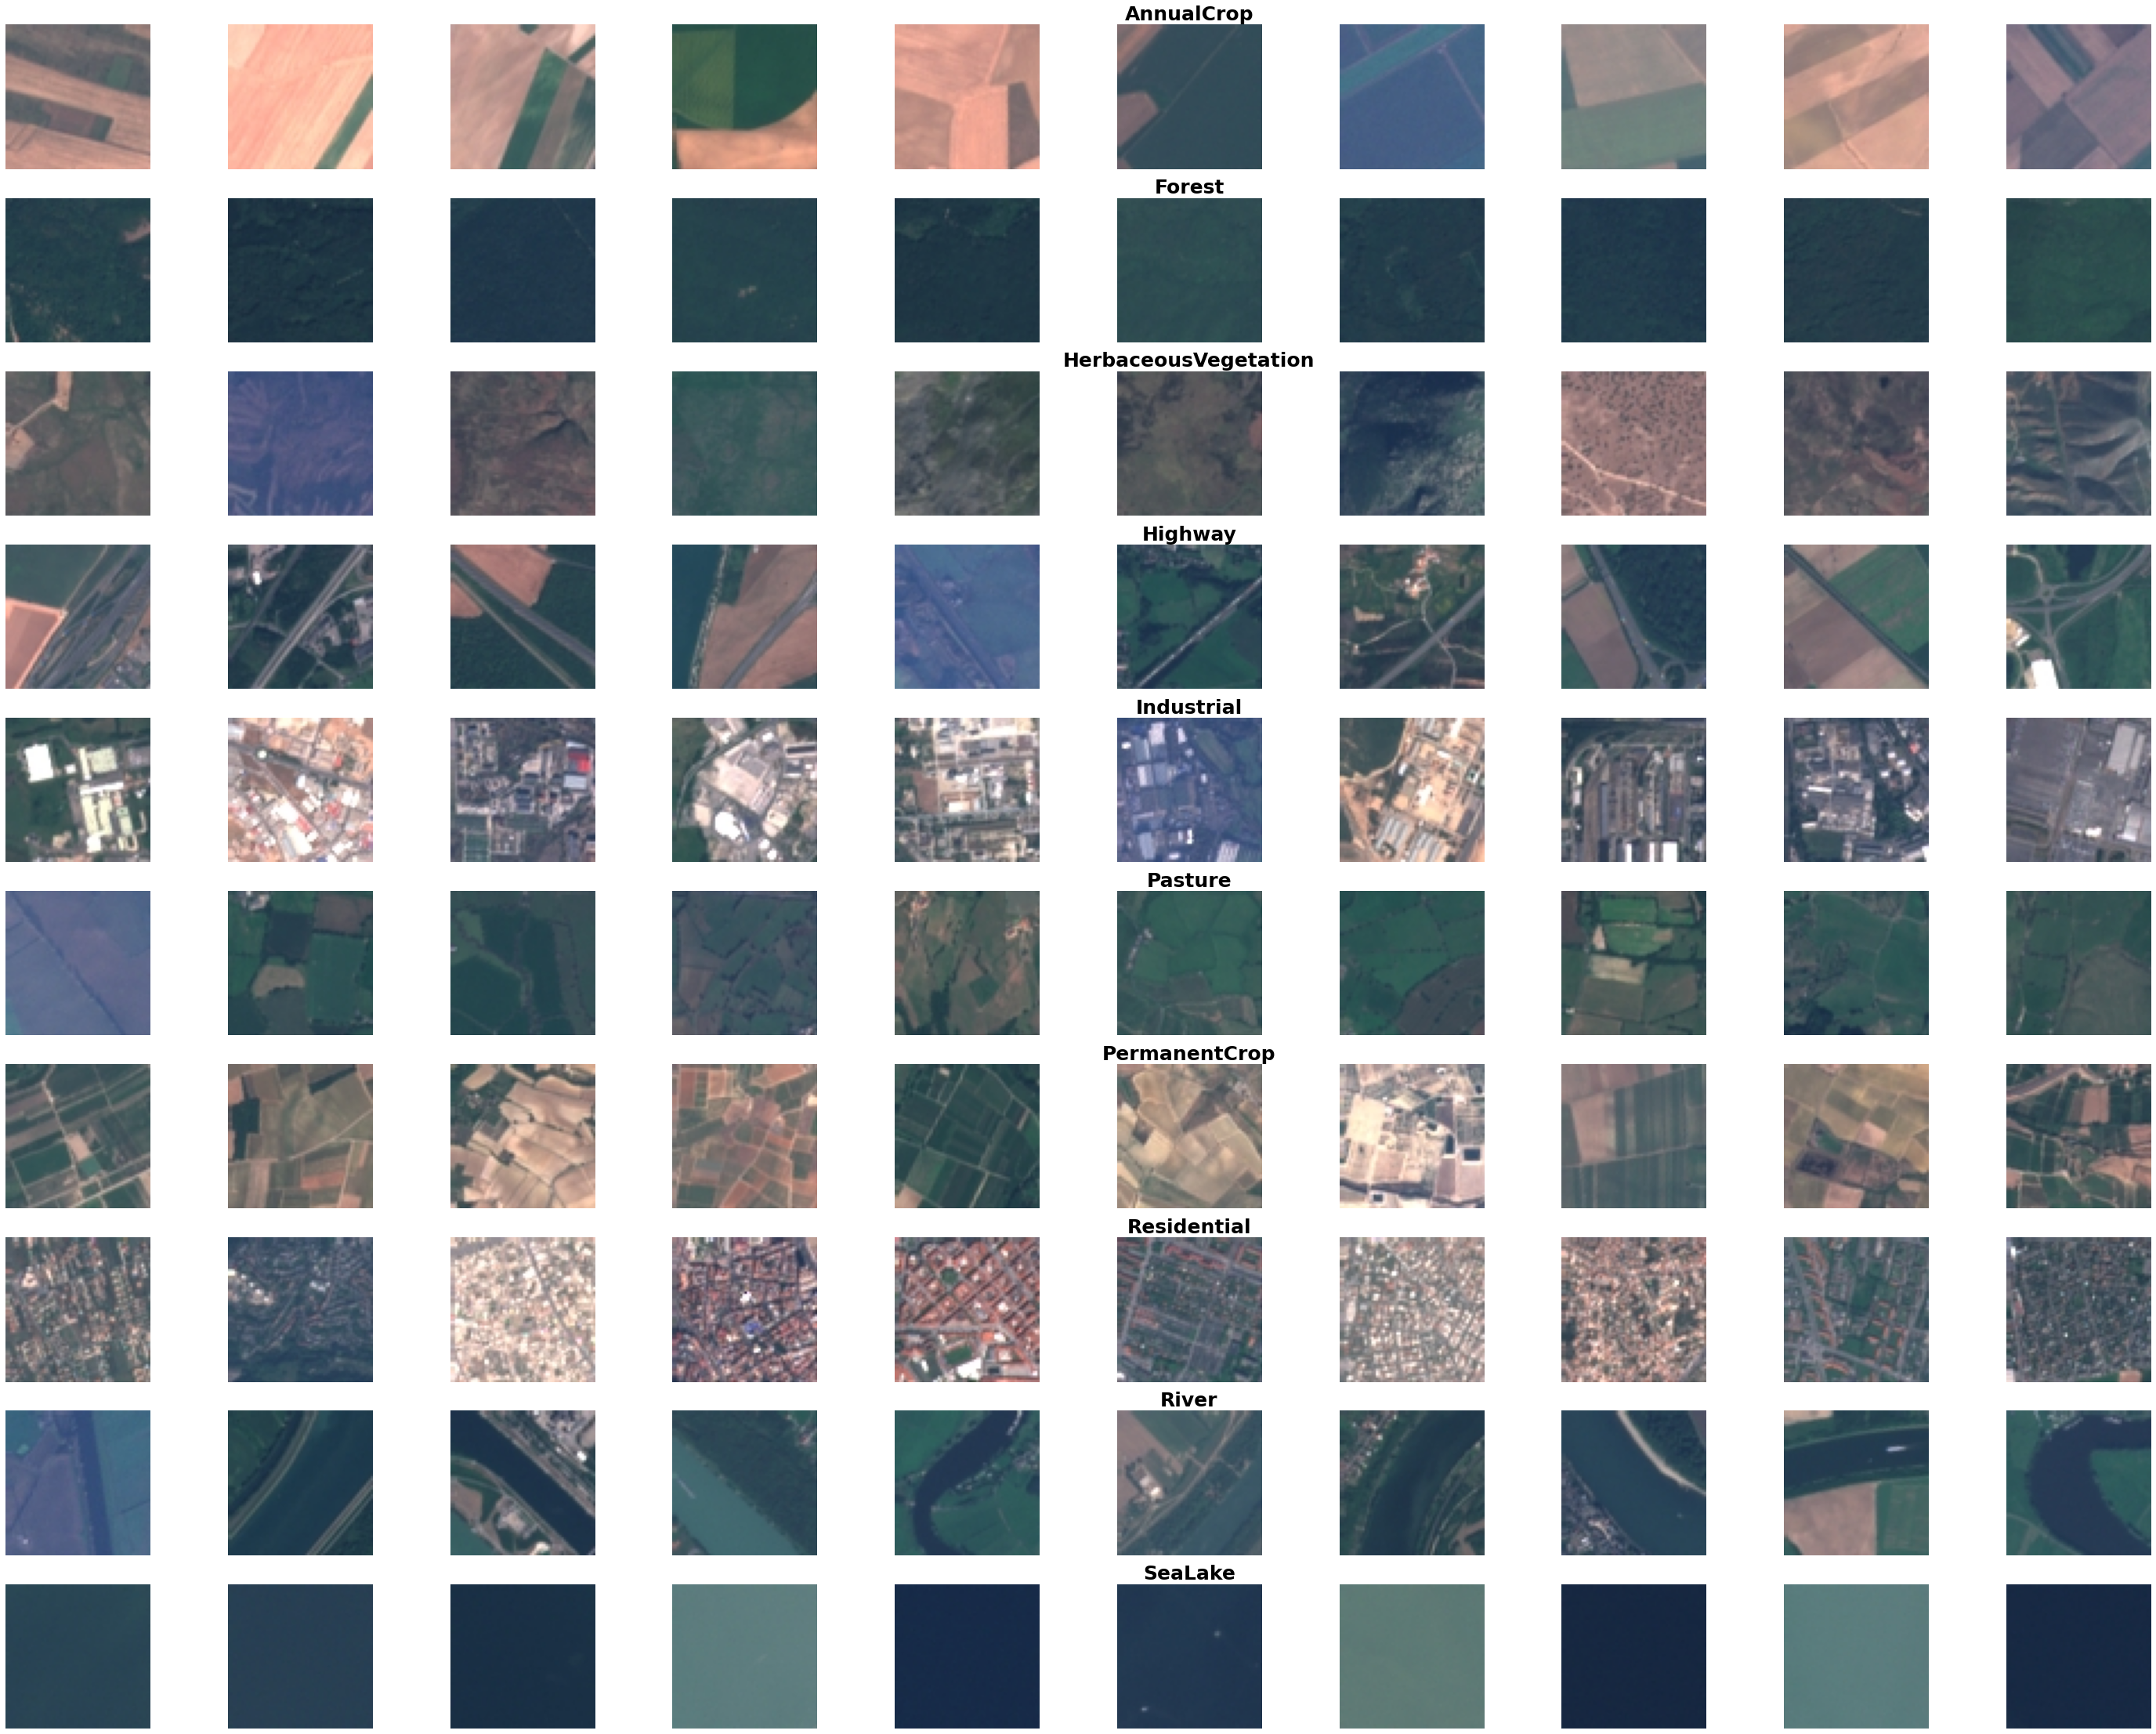

In [12]:
columns = 10
rows = 10

fig, ax = plt.subplots(rows, columns, figsize=(50,40))

for i in range(rows):
    
    ax[i][int(columns / 2)].set_title(reverse_decoder[i], fontweight="bold", size=25)
    
    for j in range(columns):
        image_path = random_image_path(i, dataset)

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ax[i][j].axis('off')
        ax[i][j].imshow(image)

plt.show()